In [7]:
using CSV, DataFrames, Distributions,StatsBase, PythonPlot, Turing
using MultivariateStats, DifferentialEquations,DynamicAxisWarping, LinearAlgebra, Optim
include("processing_functions.jl")

NSF_CAREER_PATH = "/Users/elevien/Dartmouth College Dropbox/Ethan Levien/PROPOSALS/NSFCareer2024/figures/growth_dynamics"

df_all = CSV.read("./output/data_processed.csv",DataFrames.DataFrame);
lineages = unique(df_all.lineage);

standardize(x) = (x .- mean(x)) ./ std(x)


standardize (generic function with 1 method)

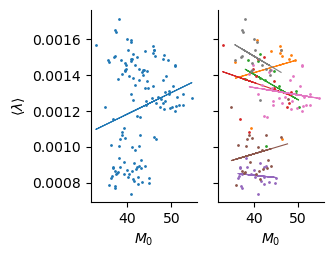

In [4]:
df_all_cells = combine(groupby(df_all,[:lineage,:position]),:gr=>mean=>:gr,:M=>(x->x[1])=>:M0,:time=>(x->x[end]-x[1])=>:gt)

fig, (ax1,ax)= subplots(figsize=(6/2,5/2),ncols=2,sharex=true,sharey=true)



ax1.plot(df_all_cells.M0,df_all_cells.gr,".",markersize=2)
df = df_all_cells
X = hcat(ones(length(df.M0)),df.M0)
b = X\df.gr
xrange = min(df.M0...):0.1:max(df.M0...)
ax1.plot(X[:,2],X*b,color="C0",lw=0.8)
ax.set_xlabel(L"$M_0$")

ax1.set_ylabel(L"$\langle \lambda \rangle$")
ax1.spines["right"].set_visible(false)
ax1.spines["top"].set_visible(false)
#ax1.tick_params(axis="both", left=false, top=false, right=false, bottom=false, labelleft=false, labeltop=false, labelright=false, labelbottom=false)
ax1.set_xlabel(L"$M_0$")


dfs = groupby(df_all_cells,:lineage)
for i in 1:length(dfs)
    df = dfs[i]
    ax.plot(df.M0,df.gr,".",color="C"*string(i),markersize=2)
    X = hcat(ones(length(df.M0)),df.M0)
    b = X\df.gr
    xrange = min(df.M0...):0.1:max(df.M0...)
    ax.plot(X[:,2],X*b,color="C"*string(i),lw=0.8)

end


ax.spines["right"].set_visible(false)
ax.spines["top"].set_visible(false)
#gca().tick_params(axis="both", left=false, top=false, right=false, bottom=false, labelleft=false, labeltop=false, labelright=false, labelbottom=false)


savefig(NSF_CAREER_PATH*"/simpsons.pdf",bbox_inches="tight")

fig

In [36]:
df_std = combine(
    groupby(df_all_cells,:lineage),
    :gr=>standardize=>:x,
    :gt=>standardize=>:w,
    :M0=>standardize=>:y
    );

U = [Array(df[:,[:x,:w,:y]]) for df in groupby(df_std,:lineage)]

7-element Vector{Matrix{Float64}}:
 [-2.2684390214819055 0.7449030364755393 0.43442975010308327; -1.9216711331927394 2.148745369601005 -1.334488684634449; … ; 0.5344836757219796 -0.5879215846436663 0.3392867992984218; 0.34665399673408753 0.023927129235012525 0.4188778434685275]
 [0.17286578551693693 -1.472713518627508 -0.27435323734478656; 0.21275447720200175 1.0974183951001024 -1.3716201593800221; … ; -0.9305826908072579 -1.5202054818176856 1.5197593444027315; -2.497157785703853 0.8751319537255388 -0.2295974436858533]
 [0.1787460457259177 0.4727790238430251 0.4951416822127881; -0.23754973083646458 -0.49846694557901733 1.3472547434786006; … ; -1.2652025325936416 2.393866215428531 -1.102188364165785; 0.354842100071785 0.5189853909327461 -0.3480619784345395]
 [-2.0592302385928254 0.01737385109552526 0.3175829553437758; -1.2236848399867057 1.4300061977601033 -1.0410045392290068; … ; -0.2653372901274749 -0.8299704951087082 -1.3322360573408847; 0.8364776802467021 -0.525458624900996 -1.17589

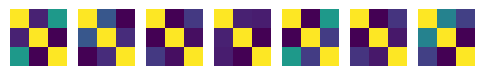

In [37]:
fig,axs = subplots(figsize=(6,4),ncols = length(U))
for i in 1:length(U)
    ax = axs[i-1]
    ax.imshow(U[i]'*U[i])
    ax.spines["right"].set_visible(false)
    ax.spines["top"].set_visible(false)
    ax.spines["left"].set_visible(false)
    ax.spines["bottom"].set_visible(false)
    ax.tick_params(bottom = false) 
    ax.tick_params(axis="both",
    left=false, top=false, right=false,
    bottom=false, labelleft=false, labeltop=false, 
    labelright=false, labelbottom=false)
end


fig